In [4]:
import pandas as pd
import numpy as np
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
current_stock = ['XRAY', 'ZTS', 'WST', 'WAT', 'TMO', 'TFX', 'TECH', 'STE', 'PKI', 'MDT', 'JNJ', 'ILMN', 'IDXX', 'HOLX', 'DXCM', 'A', 'ABBV', 'ABT', 'AMGN', 'BAX', 'BSX', 'BIO', 'COO', 'DHR']

In [5]:
logit_results = {}
logit_sgd_results = {}

for stock_name in current_stock:
    # read the sheet
    stock_data = pd.read_excel('data/data_processed_v2_0513.xlsx', sheet_name=stock_name)
    
    # separation into train/test:
    training_dataset = stock_data[stock_data['Report Date'] < '2022-01-01']
    testing_dataset = stock_data[stock_data['Report Date'] >= '2022-01-01']
    
    # feature selection:
    # find the important feature (using IG method)
    training_dataset['diff'] = training_dataset['Stock price'].diff()
    X = training_dataset.iloc[:, 3: -1]
    Y_price = training_dataset['Stock price']
    Y = np.where(training_dataset['diff'] >= 0, 1, 0)
    print(stock_name)
    importances = mutual_info_classif(X, Y, random_state=1241)
    feat_importances = pd.Series(importances, training_dataset.columns[3: -1])
    
    # feature selection:
    # select feature based on importance for both training and testing data
    feat_selected = feat_importances.to_frame('importance')
    feat_selected = feat_selected[feat_selected['importance'] > 0]
    select_feature_lst = list(feat_selected.index)
    X1 = X[np.intersect1d(X.columns, select_feature_lst)]
    testing_dataset['diff'] = testing_dataset['Stock price'].diff()
    Y_true_price = testing_dataset['Stock price']
    Y_true = np.where(testing_dataset['diff'] >= 0, 1, 0)
    testing_dataset = testing_dataset[np.intersect1d(testing_dataset.columns, select_feature_lst)]

    # run baseline logit
    logit = LogisticRegression(solver = 'lbfgs', random_state=1241)
    logit.fit(X1, Y)
#     pred = lr.predict(testing_dataset)
    score = logit.score(testing_dataset, Y_true)
    logit_results[stock_name] = score
    
    # sgd regression
    sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.46, penalty='elasticnet', random_state=125)
    sgdr.fit(X1, Y_price)
    print(X1)
    sgr_score = sgdr.score(X1, Y_price)
    
    ypred = sgdr.predict(testing_dataset)
    mse = mean_squared_error(Y_true_price, ypred)
    logit_sgd_results[stock_name] = [sgr_score, mse]
    





C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

XRAY
     (Dividends + Share Buyback) / FCF  Debt Ratio  Dividends / FCF  \
0                             0.355461    0.166802         0.086067   
1                             0.355461    0.166802         0.086067   
2                             0.355461    0.166802         0.086067   
3                             0.355461    0.166802         0.086067   
4                             0.355461    0.166802         0.086067   
..                                 ...         ...              ...   
666                           0.055866    0.240030         0.122905   
667                           0.055866    0.240030         0.122905   
668                           0.055866    0.240030         0.122905   
669                           0.159420    0.223514         0.173913   
670                           0.159420    0.223514         0.173913   

     Dummy_Dividends  Log Revenue  Net Profit Margin  Quick Ratio  \
0                  1     9.045831           0.092144     1.192965   
1   

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

ZTS
     (Dividends + Share Buyback) / FCF  Asset Turnover  CapEx / (Depr + Amor)  \
0                             0.611511        0.144998               1.513761   
1                             0.611511        0.144998               1.513761   
2                             0.611511        0.144998               1.513761   
3                             0.611511        0.144998               1.513761   
4                             0.611511        0.144998               1.513761   
..                                 ...             ...                    ...   
666                           0.774457        0.138460               1.008929   
667                           0.774457        0.138460               1.008929   
668                           0.774457        0.138460               1.008929   
669                           0.592523        0.145202               1.072727   
670                           0.592523        0.145202               1.072727   

     Current Ratio  Deb

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

WST
     (Dividends + Share Buyback) / FCF  Asset Turnover  CapEx / (Depr + Amor)  \
0                             0.171512        0.200991               1.429658   
1                             0.171512        0.200991               1.429658   
2                             0.171512        0.200991               1.429658   
3                             0.171512        0.200991               1.429658   
4                             0.171512        0.200991               1.429658   
..                                 ...             ...                    ...   
666                           0.144000        0.246668               1.975694   
667                           0.144000        0.246668               1.975694   
668                           0.144000        0.246668               1.975694   
669                           0.100962        0.224814               2.176667   
670                           0.100962        0.224814               2.176667   

     Dividends / FCF  G

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

WAT
     Debt Ratio  Dividends / FCF  Interest Coverage  Inventory Turnover  \
0      0.657461                0          24.109423            2.234571   
1      0.657461                0          24.109423            2.234571   
2      0.657461                0          24.109423            2.234571   
3      0.657461                0          24.109423            2.234571   
4      0.657461                0          24.109423            2.234571   
..          ...              ...                ...                 ...   
666    0.530299                0          23.582903            1.954431   
667    0.530299                0          23.582903            1.954431   
668    0.530299                0          23.582903            1.954431   
669    0.530299                0          22.479198            1.695750   
670    0.530299                0          22.479198            1.695750   

     Quick Ratio  R&D / Gross Profit  Return on Research Capital  \
0       1.564053           

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

TMO
     (Dividends + Share Buyback) / FCF  Asset Turnover  CapEx / (Depr + Amor)  \
0                             0.479903        0.116973               0.145621   
1                             0.479903        0.116973               0.145621   
2                             0.479903        0.116973               0.145621   
3                             0.479903        0.116973               0.145621   
4                             0.479903        0.116973               0.145621   
..                                 ...             ...                    ...   
666                           0.030231        0.136976              -2.547170   
667                           0.030231        0.136976              -2.547170   
668                           0.030231        0.136976              -2.547170   
669                           0.034272        0.126766               0.346667   
670                           0.034272        0.126766               0.346667   

     Dividends / FCF  D

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

TFX
     (Dividends + Share Buyback) / FCF  Asset Turnover  Debt Ratio  \
0                             0.122144        0.107919    0.302535   
1                             0.122144        0.107919    0.302535   
2                             0.122144        0.107919    0.302535   
3                             0.122144        0.107919    0.302535   
4                             0.122144        0.107919    0.302535   
..                                 ...             ...         ...   
666                           0.115803        0.100967    0.326640   
667                           0.115803        0.100967    0.326640   
668                           0.115803        0.100967    0.326640   
669                           0.028464        0.099468    0.291183   
670                           0.028464        0.099468    0.291183   

     Dummy_Dividends  Log Revenue  Net Profit Margin  R&D / Gross Profit  \
0                  1     8.833116           0.158991            0.082410   
1  

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

TECH
     CapEx / (Depr + Amor)  Dummy_Dividends  Gross Profit Margin  \
0                 0.708607                1             0.656467   
1                 0.708607                1             0.656467   
2                 0.708607                1             0.656467   
3                 0.708607                1             0.656467   
4                 0.708607                1             0.656467   
..                     ...              ...                  ...   
666               0.458658                1             0.679251   
667               0.458658                1             0.679251   
668               0.458658                1             0.679251   
669               0.245411                1             0.663502   
670               0.245411                1             0.663502   

     Interest Coverage  Inventory Turnover  Log Revenue  Net Profit Margin  \
0             2.114296            1.939508     8.267017           0.646836   
1             2.114296

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

STE
     Asset Turnover  Dividends / FCF  Gross Profit Margin  Quick Ratio  \
0          0.145113         0.412688             0.427960     1.649568   
1          0.145113         0.412688             0.427960     1.649568   
2          0.145113         0.412688             0.427960     1.649568   
3          0.145113         0.412688             0.427960     1.649568   
4          0.145113         0.412688             0.427960     1.649568   
..              ...              ...                  ...          ...   
666        0.080028         0.827891             0.440182     1.116302   
667        0.080028         0.827891             0.440182     1.116302   
668        0.080028         0.827891             0.440182     1.116302   
669        0.101850         0.454415             0.401295     1.457930   
670        0.101850         0.454415             0.401295     1.457930   

     R&D / Revenue  Return on Assets  Return on Equity  \
0         0.021294          0.019666          0.0

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

PKI
     Asset Turnover  Interest Coverage  Inventory Turnover  Log Revenue  \
0          0.123192           1.916438            2.256690     8.906063   
1          0.123192           1.916438            2.256690     8.906063   
2          0.123192           1.916438            2.256690     8.906063   
3          0.123192           1.916438            2.256690     8.906063   
4          0.123192           1.916438            2.256690     8.906063   
..              ...                ...                 ...          ...   
666        0.140566         -53.792988            2.392679     9.089365   
667        0.140566         -53.792988            2.392679     9.089365   
668        0.140566         -53.792988            2.392679     9.089365   
669        0.078302           3.717638            1.807638     9.066953   
670        0.078302           3.717638            1.807638     9.066953   

     Net Profit Margin  R&D / Gross Profit  R&D / Revenue  Share Buyback / FCF  
0             

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

MDT
     Asset Turnover  CapEx / (Depr + Amor)  Dividends / FCF  \
0          0.084632               0.421759         0.456439   
1          0.084632               0.421759         0.456439   
2          0.084632               0.421759         0.456439   
3          0.084632               0.421759         0.456439   
4          0.084632               0.421759         0.456439   
..              ...                    ...              ...   
666        0.087002               0.563338         0.925602   
667        0.087002               0.563338         0.925602   
668        0.087002               0.563338         0.925602   
669        0.087002               0.563338         0.925602   
670        0.087002               0.563338         0.925602   

     Gross Profit Margin  Inventory Turnover  Log Revenue  Net Profit Margin  \
0               0.689333            1.906482     9.886829           0.177005   
1               0.689333            1.906482     9.886829           0.177005   

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

JNJ
     Asset Turnover  Debt Ratio  Dividends / FCF  Gross Profit Margin  \
0          0.131537    0.175593         0.471698             0.656143   
1          0.131537    0.175593         0.471698             0.656143   
2          0.131537    0.175593         0.471698             0.656143   
3          0.131537    0.175593         0.471698             0.656143   
4          0.131537    0.175593         0.471698             0.656143   
..              ...         ...              ...                  ...   
666        0.132124    0.189770         0.541416             0.674545   
667        0.132124    0.189770         0.541416             0.674545   
668        0.132124    0.189770         0.541416             0.674545   
669        0.130214    0.189301         0.405139             0.689348   
670        0.130214    0.189301         0.405139             0.689348   

     Interest Coverage  Log Revenue  Net Profit Margin  Quick Ratio  \
0          1085.500000    10.316955           0.

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

ILMN
     Asset Turnover  CapEx / (Depr + Amor)  Dummy_Dividends  \
0          0.130126               1.266667                0   
1          0.130126               1.266667                0   
2          0.130126               1.266667                0   
3          0.130126               1.266667                0   
4          0.130126               1.266667                0   
..              ...                    ...              ...   
666        0.129798               0.897959                0   
667        0.129798               0.897959                0   
668        0.129798               0.897959                0   
669        0.073558               0.800000                0   
670        0.073558               0.800000                0   

     Interest Coverage  Log Revenue  Net Profit Margin  tweet_polarity  
0           -53.600000     8.978637           0.251050        0.006974  
1           -53.600000     8.978637           0.251050        0.031291  
2           -53.600

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

IDXX


C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVer

     (Dividends + Share Buyback) / FCF  Asset Turnover  Current Ratio  \
0                             1.217530        0.330398       0.936998   
1                             1.217530        0.330398       0.936998   
2                             1.217530        0.330398       0.936998   
3                             1.217530        0.330398       0.936998   
4                             1.217530        0.330398       0.936998   
..                                 ...             ...            ...   
666                           0.845648        0.342492       1.536073   
667                           0.845648        0.342492       1.536073   
668                           0.845648        0.342492       1.536073   
669                           1.203878        0.339693       1.479906   
670                           1.203878        0.339693       1.479906   

     Dividends / FCF  Dummy_Dividends  Gross Profit Margin  Interest Coverage  \
0                  0                0     

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

HOLX
     Debt Ratio  Dividends / FCF  Dummy_Dividends  Gross Profit Margin  \
0      0.489900                0                0             0.540388   
1      0.489900                0                0             0.540388   
2      0.489900                0                0             0.540388   
3      0.489900                0                0             0.540388   
4      0.489900                0                0             0.540388   
..          ...              ...              ...                  ...   
666    0.365667                0                0             0.600531   
667    0.365667                0                0             0.600531   
668    0.365667                0                0             0.600531   
669    0.342123                0                0             0.628969   
670    0.342123                0                0             0.628969   

     Interest Coverage  Net Profit Margin  Quick Ratio  R&D / Revenue  \
0             5.107492           

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

DXCM
     Debt Ratio  Dividends / FCF  Dummy_Dividends  Gross Profit Margin  \
0      0.433476                0                0             0.668323   
1      0.433476                0                0             0.668323   
2      0.433476                0                0             0.668323   
3      0.433476                0                0             0.668323   
4      0.433476                0                0             0.668323   
..          ...              ...              ...                  ...   
666    0.384009                0                0             0.700891   
667    0.384009                0                0             0.700891   
668    0.384009                0                0             0.700891   
669    0.360728                0                0             0.687327   
670    0.360728                0                0             0.687327   

     Inventory Turnover  Log Revenue  Net Profit Margin  R&D / Gross Profit  \
0              3.863105    

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

A
     (Dividends + Share Buyback) / FCF  CapEx / (Depr + Amor)  Debt Ratio  \
0                             0.345070               0.394737    0.254655   
1                             0.345070               0.394737    0.254655   
2                             0.345070               0.394737    0.254655   
3                             0.345070               0.394737    0.254655   
4                             0.345070               0.394737    0.254655   
..                                 ...                    ...         ...   
666                           0.521429               0.642857    0.272424   
667                           0.521429               0.642857    0.272424   
668                           0.521429               0.642857    0.272424   
669                           0.521429               0.642857    0.272424   
670                           0.521429               0.642857    0.272424   

     Dividends / FCF  Dummy_Dividends  Log Revenue  Net Profit Margin  \


C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

ABBV
     (Dividends + Share Buyback) / FCF  Current Ratio  Dividends / FCF  \
0                             0.512532       3.177350         0.512532   
1                             0.512532       3.177350         0.512532   
2                             0.512532       3.177350         0.512532   
3                             0.512532       3.177350         0.512532   
4                             0.512532       3.177350         0.512532   
..                                 ...            ...              ...   
666                           0.478594       0.906394         0.492013   
667                           0.478594       0.906394         0.492013   
668                           0.478594       0.906394         0.492013   
669                           0.297486       1.014860         0.299948   
670                           0.297486       1.014860         0.299948   

     Dummy_Dividends  Log Revenue  Net Profit Margin  Quick Ratio  \
0                  1     9.939719    

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

ABT
     Dividends / FCF  Dummy_Dividends  Log Revenue  Net Profit Margin  \
0           0.286579                1     9.919810           0.126173   
1           0.286579                1     9.919810           0.126173   
2           0.286579                1     9.919810           0.126173   
3           0.286579                1     9.919810           0.126173   
4           0.286579                1     9.919810           0.126173   
..               ...              ...          ...                ...   
666         0.468222                1    10.009578           0.116306   
667         0.468222                1    10.009578           0.116306   
668         0.468222                1    10.009578           0.116306   
669         0.357589                1    10.038541           0.192167   
670         0.357589                1    10.038541           0.192167   

     Quick Ratio  R&D / Gross Profit  R&D / Revenue  Return on Assets  \
0       0.880512            0.121926       0.0

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

AMGN
     Asset Turnover  CapEx / (Depr + Amor)  Dummy_Dividends  \
0           0.10379               0.267806                1   
1           0.10379               0.267806                1   
2           0.10379               0.267806                1   
3           0.10379               0.267806                1   
4           0.10379               0.267806                1   
..              ...                    ...              ...   
666         0.10918               0.216374                1   
667         0.10918               0.216374                1   
668         0.10918               0.216374                1   
669         0.10318               0.284706                1   
670         0.10318               0.284706                1   

     Gross Profit Margin  Interest Coverage  Inventory Turnover  Log Revenue  \
0               0.797805           6.803987            1.729074     9.792181   
1               0.797805           6.803987            1.729074     9.792181  

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

BAX
     (Dividends + Share Buyback) / FCF  Asset Turnover  CapEx / (Depr + Amor)  \
0                            -0.003135        0.167042               0.913876   
1                            -0.003135        0.167042               0.913876   
2                            -0.003135        0.167042               0.913876   
3                            -0.003135        0.167042               0.913876   
4                            -0.003135        0.167042               0.913876   
..                                 ...             ...                    ...   
666                           1.225705        0.157403               0.711712   
667                           1.225705        0.157403               0.711712   
668                           1.225705        0.157403               0.711712   
669                           0.270161        0.162872               0.868932   
670                           0.270161        0.162872               0.868932   

     Current Ratio  Deb

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

BSX
     (Dividends + Share Buyback) / FCF  Asset Turnover  Dividends / FCF  \
0                            -0.019608        0.095011         0.000000   
1                            -0.019608        0.095011         0.000000   
2                            -0.019608        0.095011         0.000000   
3                            -0.019608        0.095011         0.000000   
4                            -0.019608        0.095011         0.000000   
..                                 ...             ...              ...   
666                          -0.011132        0.098723         0.025974   
667                          -0.011132        0.098723         0.025974   
668                          -0.011132        0.098723         0.025974   
669                          -0.137741        0.091979         0.038567   
670                          -0.137741        0.091979         0.038567   

     Dummy_Dividends  Interest Coverage  Net Profit Margin  Quick Ratio  \
0                  0

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

BIO


C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

     (Dividends + Share Buyback) / FCF  CapEx / (Depr + Amor)  Current Ratio  \
0                             0.033125                      0       2.407694   
1                             0.033125                      0       2.407694   
2                             0.033125                      0       2.407694   
3                             0.033125                      0       2.407694   
4                             0.033125                      0       2.407694   
..                                 ...                    ...            ...   
666                          -0.030898                      0       3.899302   
667                          -0.030898                      0       3.899302   
668                          -0.030898                      0       3.899302   
669                          -0.032451                      0       3.794777   
670                          -0.032451                      0       3.794777   

     Gross Profit Margin  Interest Cove

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Dep

DHR
     (Dividends + Share Buyback) / FCF  CapEx / (Depr + Amor)  \
0                             1.851598               0.598262   
1                             1.851598               0.598262   
2                             1.851598               0.598262   
3                             1.851598               0.598262   
4                             1.851598               0.598262   
..                                 ...                    ...   
666                           0.084802               0.579048   
667                           0.084802               0.579048   
668                           0.084802               0.579048   
669                           0.089161               0.574007   
670                           0.089161               0.574007   

     Dividends / FCF  Dummy_Dividends  Gross Profit Margin  Interest Coverage  \
0           0.152262                1             0.555409         -41.435345   
1           0.152262                1             0.5

In [6]:
logit_results

{'XRAY': 0.43859649122807015,
 'ZTS': 0.6842105263157895,
 'WST': 0.42105263157894735,
 'WAT': 0.3333333333333333,
 'TMO': 0.4473684210526316,
 'TFX': 0.5701754385964912,
 'TECH': 0.38596491228070173,
 'STE': 0.43859649122807015,
 'PKI': 0.49122807017543857,
 'MDT': 0.47368421052631576,
 'JNJ': 0.5350877192982456,
 'ILMN': 0.5877192982456141,
 'IDXX': 0.35964912280701755,
 'HOLX': 0.45614035087719296,
 'DXCM': 0.5263157894736842,
 'A': 0.37719298245614036,
 'ABBV': 0.6140350877192983,
 'ABT': 0.4473684210526316,
 'AMGN': 0.4473684210526316,
 'BAX': 0.4649122807017544,
 'BSX': 0.4649122807017544,
 'BIO': 0.6666666666666666,
 'COO': 0.5175438596491229,
 'DHR': 0.3508771929824561}

the code below is for seperately handling stocks 

In [7]:
ZTS = pd.read_excel('data/data_processed_v2_0513.xlsx', sheet_name='ZTS')
BIO = pd.read_excel('data/data_processed_v2_0513.xlsx', sheet_name='BIO')
ABBV = pd.read_excel('data/data_processed_v2_0513.xlsx', sheet_name='ABBV')

In [8]:
# Some separation into train/test
ZTS_train = ZTS[ZTS['Report Date'] < '2022-01-01']
ZTS_test = ZTS[ZTS['Report Date'] >= '2022-01-01']
BIO_train = BIO[BIO['Report Date'] < '2022-01-01']
BIO_test = BIO[BIO['Report Date'] >= '2022-01-01']
ABBV_train = ABBV[ABBV['Report Date'] < '2022-01-01']
ABBV_test = ABBV[ABBV['Report Date'] >= '2022-01-01']
test_dates = ZTS_test['Report Date']

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Depr

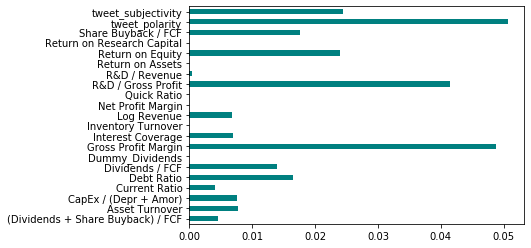

In [10]:
# feature selection for JNJ
ZTS_train['diff'] =ZTS_train['Stock price'].diff()
X_ZTS = ZTS_train.iloc[:, 3: -1]
Y_ZTS_price = ZTS_train['Stock price']
Y_ZTS = np.where(ZTS_train['diff'] >= 0, 1, 0)
importances = mutual_info_classif(X_ZTS, Y_ZTS, random_state=1241)
feat_importances_ZTS = pd.Series(importances, ZTS_train.columns[3: -1])
feat_importances_ZTS.plot(kind='barh', color ="teal")
plt.show()

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Depr

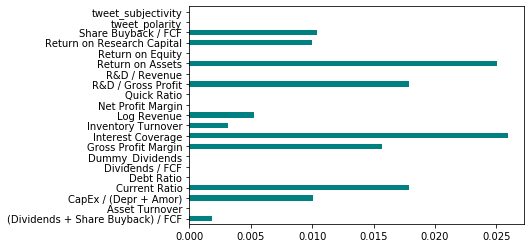

In [11]:
# feature selection for ABT
BIO_train['diff'] = BIO_train['Stock price'].diff()
X_BIO = BIO_train.iloc[:, 3: -1]
Y_BIO_price = BIO_train['Stock price']
Y_BIO = np.where(BIO_train['diff'] >= 0, 1, 0)
importances = mutual_info_classif(X_BIO, Y_BIO, random_state=1241)
feat_importances_BIO = pd.Series(importances, BIO_train.columns[3: -1])
feat_importances_BIO.plot(kind='barh', color ="teal")
plt.show()

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: Depr

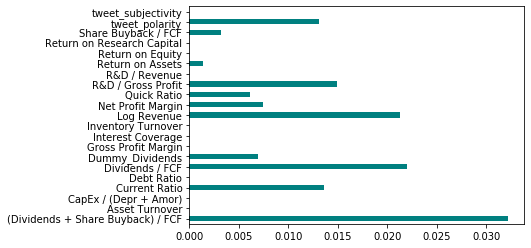

In [13]:
# feature selection for ABT
ABBV_train['diff'] = ABBV_train['Stock price'].diff()
X_ABBV = ABBV_train.iloc[:, 3: -1]
Y_ABBV_price = ABBV_train['Stock price']
Y_ABBV = np.where(ABBV_train['diff'] >= 0, 1, 0)
importances = mutual_info_classif(X_ABBV, Y_ABBV, random_state=1241)
feat_importances_ABBV = pd.Series(importances, ABBV_train.columns[3: -1])
feat_importances_ABBV.plot(kind='barh', color ="teal")
plt.show()

In [14]:
# subset cols deemed 'relevant'
# jnj
feat_ZTS = feat_importances_ZTS.to_frame('importance')
feat_ZTS = feat_ZTS[feat_ZTS['importance'] > 0]
ZTS_lst = list(feat_ZTS.index)
X1_ZTS = X_ZTS[np.intersect1d(X_ZTS.columns, ZTS_lst)]
ZTS_test['diff'] = ZTS_test['Stock price'].diff()
Y_ZTS_true_price = ZTS_test['Stock price']
Y_ZTS_true = np.where(ZTS_test['diff'] >= 0, 1, 0)
ZTS_test = ZTS_test[np.intersect1d(ZTS_test.columns, ZTS_lst)]

# abt
feat_BIO = feat_importances_BIO.to_frame('importance')
feat_BIO = feat_BIO[feat_BIO['importance'] > 0]
BIO_lst = list(feat_BIO.index)
X1_BIO = X_BIO[np.intersect1d(X_BIO.columns, BIO_lst)]
BIO_test['diff'] = BIO_test['Stock price'].diff()
Y_BIO_true_price = BIO_test['Stock price']
Y_BIO_true = np.where(BIO_test['diff'] >= 0, 1, 0)
BIO_test = BIO_test[np.intersect1d(BIO_test.columns, BIO_lst)]

# abt
feat_ABBV = feat_importances_ABBV.to_frame('importance')
feat_ABBV = feat_ABBV[feat_ABBV['importance'] > 0]
ABBV_lst = list(feat_ABBV.index)
X1_ABBV = X_ABBV[np.intersect1d(X_ABBV.columns, ABBV_lst)]
ABBV_test['diff'] = ABBV_test['Stock price'].diff()
Y_ABBV_true_price = ABBV_test['Stock price']
Y_ABBV_true = np.where(ABBV_test['diff'] >= 0, 1, 0)
ABBV_test = ABBV_test[np.intersect1d(ABBV_test.columns, ABBV_lst)]

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [15]:
# baseline logit
# zts
lr_ZTS = LogisticRegression(solver = 'lbfgs', random_state=1241)
lr_ZTS.fit(X1_ZTS, Y_ZTS)
pred_ZTS = lr_ZTS.predict(ZTS_test)
score_ZTS = lr_ZTS.score(ZTS_test, Y_ZTS_true)

# bio
lr_BIO = LogisticRegression(solver = 'lbfgs', random_state=1241)
lr_BIO.fit(X1_BIO, Y_BIO)
pred_BIO = lr_BIO.predict(BIO_test)
score_BIO = lr_BIO.score(BIO_test, Y_BIO_true)

# abbv
lr_ABBV = LogisticRegression(solver = 'lbfgs', random_state=1241)
lr_ABBV.fit(X1_ABBV, Y_ABBV)
pred_ABBV = lr_ABBV.predict(ABBV_test)
score_ABBV = lr_ABBV.score(ABBV_test, Y_ABBV_true)

score_ZTS, score_BIO, score_ABBV

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


(0.6842105263157895, 0.6666666666666666, 0.6140350877192983)

In [20]:
# sgd regression
# zts
sgdr_ZTS = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.015, penalty='elasticnet', random_state=125)
sgdr_ZTS.fit(X1_ZTS, Y_ZTS_price)

score = sgdr_ZTS.score(X1_ZTS, Y_ZTS_price)
print("R-squared:", score)

ypred_ZTS = sgdr_ZTS.predict(ZTS_test)

mse = mean_squared_error(Y_ZTS_true_price, ypred_ZTS)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

# bio
sgdr_BIO = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.00002, penalty='elasticnet', random_state=123)
sgdr_BIO.fit(X1_BIO, Y_BIO_price)

score = sgdr_BIO.score(X1_BIO, Y_BIO_price)
print("R-squared:", score)

ypred_BIO = sgdr_BIO.predict(BIO_test)

mse = mean_squared_error(Y_BIO_true_price, ypred_BIO)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))


# ABBV
sgdr_ABBV = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.0276, penalty='elasticnet', random_state=123)
sgdr_ABBV.fit(X1_ABBV, Y_ABBV_price)

score = sgdr_ABBV.score(X1_ABBV, Y_ABBV_price)
print("R-squared:", score)

ypred_ABBV = sgdr_ABBV.predict(BIO_test)

mse = mean_squared_error(Y_ABBV_true_price, ypred_ABBV)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))



R-squared: 0.7996069321336345
MSE:  2680.0822073905006
RMSE:  51.76951040323349
R-squared: 0.6663837803437009
MSE:  43665.839089568144
RMSE:  208.96372673162236
R-squared: 0.6424621666821905
MSE:  16000887.25420478
RMSE:  4000.110905238101


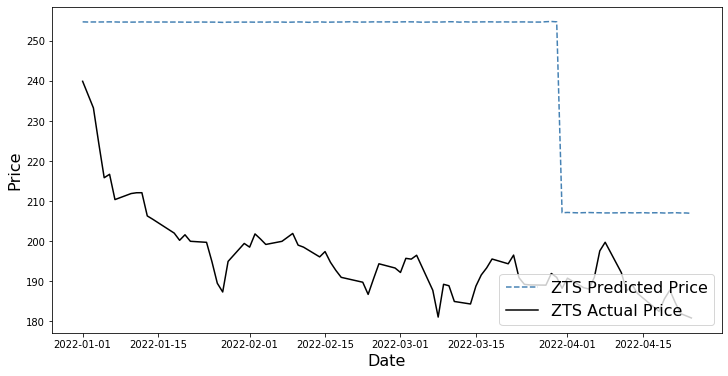

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

#ax.plot(test_dates, ypred_j, color="steelblue", label='JNJ Predicted Price', ls = 'dashed')
#ax.plot(test_dates, Y_jnj_true_price, color="grey", label='JNJ Actual Price')
ax.plot(test_dates, ypred_ZTS, color="steelblue", label='ZTS Predicted Price', ls = 'dashed')
ax.plot(test_dates, Y_ZTS_true_price, color="black", label='ZTS Actual Price')
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Price", fontsize=16)
plt.show()

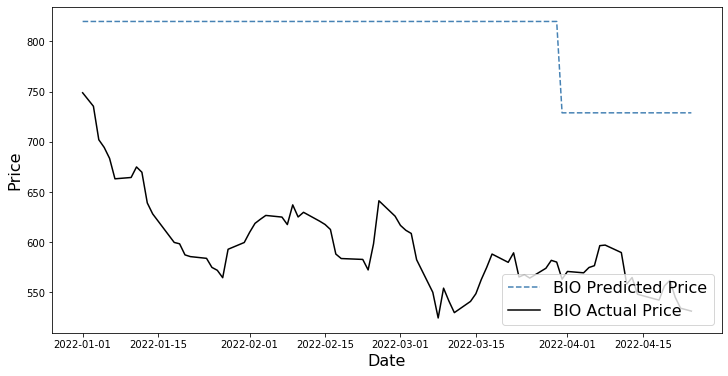

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

#ax.plot(test_dates, ypred_j, color="steelblue", label='JNJ Predicted Price', ls = 'dashed')
#ax.plot(test_dates, Y_jnj_true_price, color="grey", label='JNJ Actual Price')
ax.plot(test_dates, ypred_BIO, color="steelblue", label='BIO Predicted Price', ls = 'dashed')
ax.plot(test_dates, Y_BIO_true_price, color="black", label='BIO Actual Price')
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Price", fontsize=16)
plt.show()

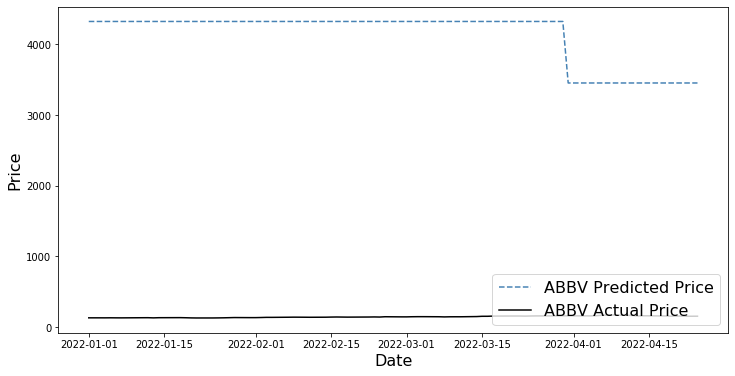

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

#ax.plot(test_dates, ypred_j, color="steelblue", label='JNJ Predicted Price', ls = 'dashed')
#ax.plot(test_dates, Y_jnj_true_price, color="grey", label='JNJ Actual Price')
ax.plot(test_dates, ypred_ABBV, color="steelblue", label='ABBV Predicted Price', ls = 'dashed')
ax.plot(test_dates, Y_ABBV_true_price, color="black", label='ABBV Actual Price')
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Price", fontsize=16)
plt.show()

In [10]:
# sgd classifier (logit w/ SGD)
# jnj
sgdc_j = SGDClassifier(alpha=0.0001, epsilon=0.01, eta0=0.5, random_state=12345)
sgdc_j.fit(X1_jnj, Y_jnj)

score = sgdc_j.score(X1_jnj, Y_jnj)
print("R-squared:", score)

ypred_j = sgdc_j.predict(jnj_test)

mse = mean_squared_error(Y_jnj_true, ypred_j)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
print("Score: ", sgdc_j.score(jnj_test, Y_jnj_true))

# abt
sgdc_a = SGDClassifier(alpha=0.0001, epsilon=0.01, eta0=0.5, random_state=12346)
sgdc_a.fit(X1_jnj, Y_jnj)

score = sgdc_a.score(X1_jnj, Y_jnj)
print("R-squared:", score)

ypred_a = sgdc_a.predict(jnj_test)

mse = mean_squared_error(Y_jnj_true, ypred_a)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
print("Score: ", sgdc_a.score(jnj_test, Y_jnj_true))

R-squared: 0.5022354694485842
MSE:  0.42105263157894735
RMSE:  0.6488856845230502
Score:  0.5789473684210527
R-squared: 0.4977645305514158
MSE:  0.5789473684210527
RMSE:  0.7608859102526822
Score:  0.42105263157894735
